# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [1]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [2]:
filtroColumnas<-weatherPraga[,c("DATE", "PRCP")]
head(filtroColumnas[order(filtroColumnas$PRCP, na.last = TRUE, decreasing = TRUE),], 10)


,DATE,PRCP
165,1939,745.5
54,1828,665.4
228,2002,661.5
172,1946,638.3
116,1890,637.3
63,1837,634.9
184,1958,633.1
57,1831,625.7
192,1966,624.1
55,1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

In [3]:
library("ggplot2")

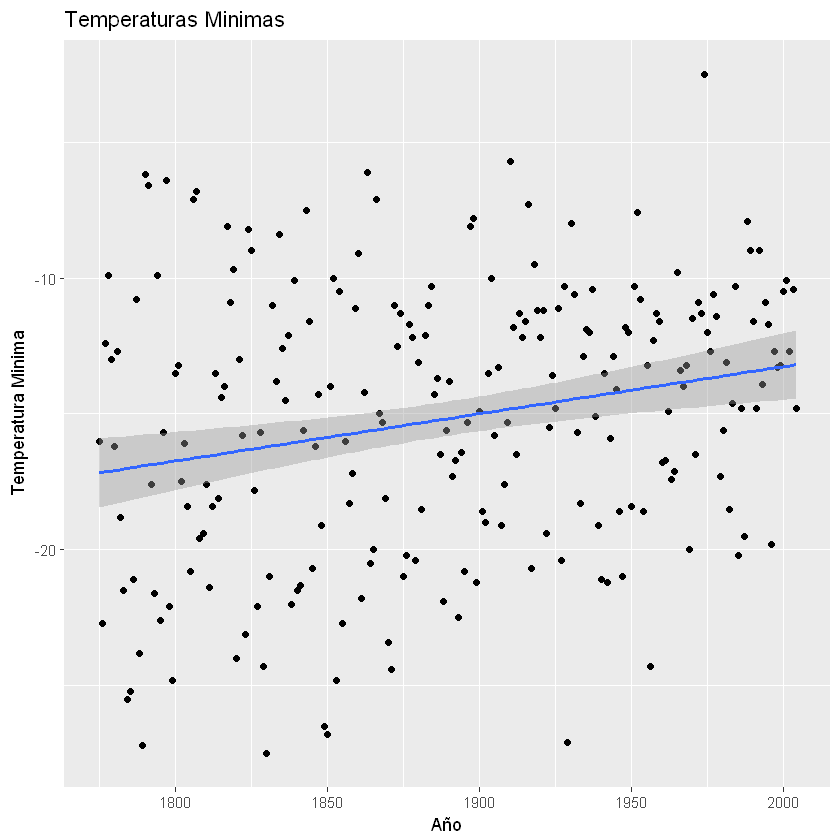

In [4]:
ggplot(weatherPraga, aes(x=DATE, y=EMNT)) + geom_point() + ggtitle("Temperaturas Minimas") + xlab("Año") + ylab("Temperatura Minima") + geom_smooth(method=lm)

In [5]:
model<-lm(data=weatherPraga,weatherPraga$EMNT~weatherPraga$DATE)
weatherPraga$predicted = predict(model, weatherPraga)
print(paste("En media, la temperatura mínima ha aumentado ", round(model$coef[2], 4), " grados cada año"))

[1] "En media, la temperatura mínima ha aumentado  0.0174  grados cada año"


¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [6]:
intervalo1<-subset(weatherPraga, DATE >= 1775 & DATE <=1794)
print(paste("La media de la temperatura minima entre 1775 y 1794 es: ", mean(intervalo1$EMNT)))
intervalo2<-subset(weatherPraga, DATE >= 1985 & DATE <=2004)
print(paste("La media de la temperatura minima entre 1985 y 2004 es: ", mean(intervalo2$EMNT))) 
print(paste("La diferencia es:",mean(intervalo1$EMNT)-mean(intervalo2$EMNT),"ºC"))
shapiro1<-shapiro.test(intervalo1$EMNT)
shapiro2<-shapiro.test(intervalo2$EMNT)
print(paste("Test de shapiro. El pvalor en los dos intervalos es",
            shapiro1$p.value,"y",shapiro2$p.value,". Ambos altos, asumimos normalidad."))
print("Son dos gausianas aplicamos test de Welch")
resultado<-t.test(intervalo1$EMNT, intervalo2$EMNT)

print(paste("Su p-valor es ",resultado$p.value,"<0.05."))
print("Descartamos hipótesis nula, la diferencia es estadísticamente significativa.")

[1] "La media de la temperatura minima entre 1775 y 1794 es:  -16.935"
[1] "La media de la temperatura minima entre 1985 y 2004 es:  -13.04"
[1] "La diferencia es: -3.895 ºC"
[1] "Test de shapiro. El pvalor en los dos intervalos es 0.380826132704572 y 0.0751036246207044 . Ambos altos, asumimos normalidad."
[1] "Son dos gausianas aplicamos test de Welch"
[1] "Su p-valor es  0.0257068429001728 <0.05."
[1] "Descartamos hipótesis nula, la diferencia es estadísticamente significativa."


#  <font color='red'>Comentario</font> 


Supongo que es una errata y que querías decir:
Con un valor de p-value por debajo de **0.05** podemos asumir que efectivamente es significativa la diferencia entre ambos

## Datos banco mundial

Carga los datos del banco mundial

In [7]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [11]:
co2eq1970<-subset(databank,
                  Indicator.Code=="EN.ATM.GHGT.KT.CE" & Country.Code 
                  %in% realCountryData$Country.Code)[,c("Country.Name","1970")]

print(paste("El país que más toneladas equivalentes de CO2 emitió en 1970 fue:",
            co2eq1970[which.max(co2eq1970$"1970"),"Country.Name"]))

print(paste("Emitió: ",max(co2eq1970$"1970",na.rm=T),"kt de CO2"))

[1] "El país que más toneladas equivalentes de CO2 emitió en 1970 fue: "


Warning message in max(co2eq1970$"1970", na.rm = T):
"ningun argumento finito para max; retornando -Inf"

[1] "Emitió:  -Inf kt de CO2"


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [10]:
co22012<-subset(databank,Indicator.Code=="EN.ATM.GHGT.KT.CE" & 
                  databank$Country.Code %in% realCountryData$Country.Code)[,c("Country.Name","2012")]
co22012<-na.omit(co22012)
head(co22012[order(co22012$"2012",decreasing = T),],5)

Country.Name,2012


¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [12]:
myGeometricMean<-function(X,na.rm=F){
    if (na.rm){
        X<-na.omit(X)
    }
    m<-1
    for (xi in X){
        m<-m*xi        
    }
    m^(1/length(X))
}
library(reshape2)
China<-subset(databank,Indicator.Code=="EN.ATM.GHGT.KT.CE" & databank$Country.Code=="CHN")

China<-melt(China[,45:57])


China$ratio<-c(NA,China$value[2:nrow(China)]/China$value[1:nrow(China)-1])

mediaIncrementos<-(myGeometricMean(China$ratio,na.rm=T)-1)*100
print(paste0("Media de los incrementos anuales:", round(mediaIncrementos,2),"%"))


No id variables; using all as measure variables


[1] "Media de los incrementos anuales:7.76%"


#  <font color='red'>Comentario</font> 


Realmente aquí habría que haber hecho la media geométrica como en el ejemplo de los bitcoins del notebook *2 - Funciones comunes.ipynb*:

Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2017 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

No id variables; using all as measure variables


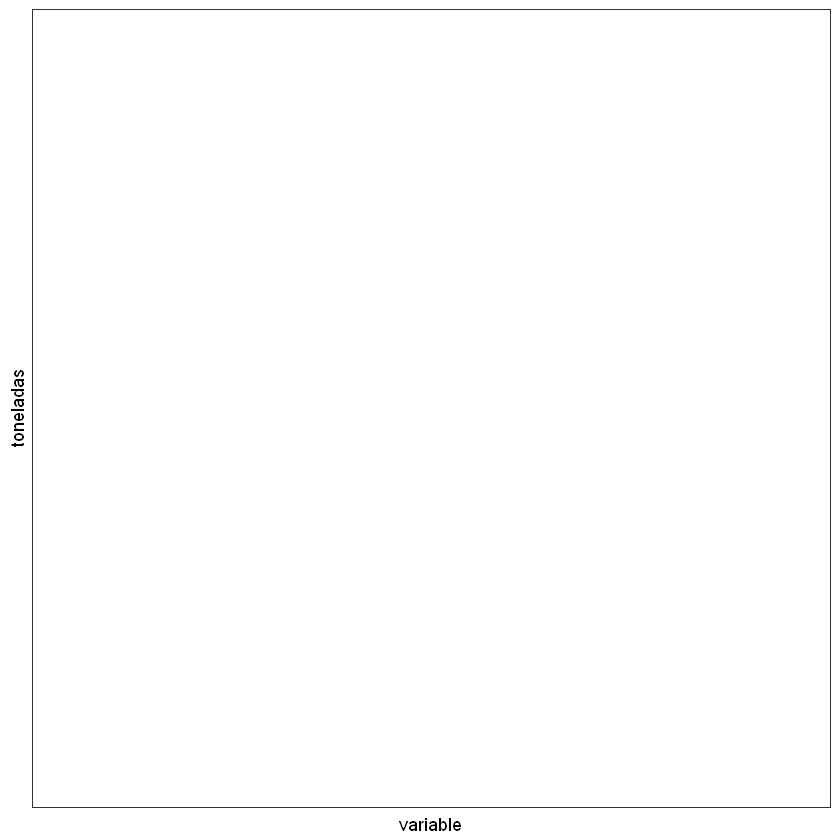

In [14]:
library(reshape2)
library(ggplot2)

kt<-subset(databank,Indicator.Code=="EN.ATM.CO2E.PC" & 
               databank$Country.Code %in% realCountryData$Country.Code)

temporal<-melt(kt[,c("1960","1990","2014")])
ggplot(temporal,aes(y=value,x=variable))+geom_boxplot(na.rm=T)+theme_bw()+ylab("toneladas")

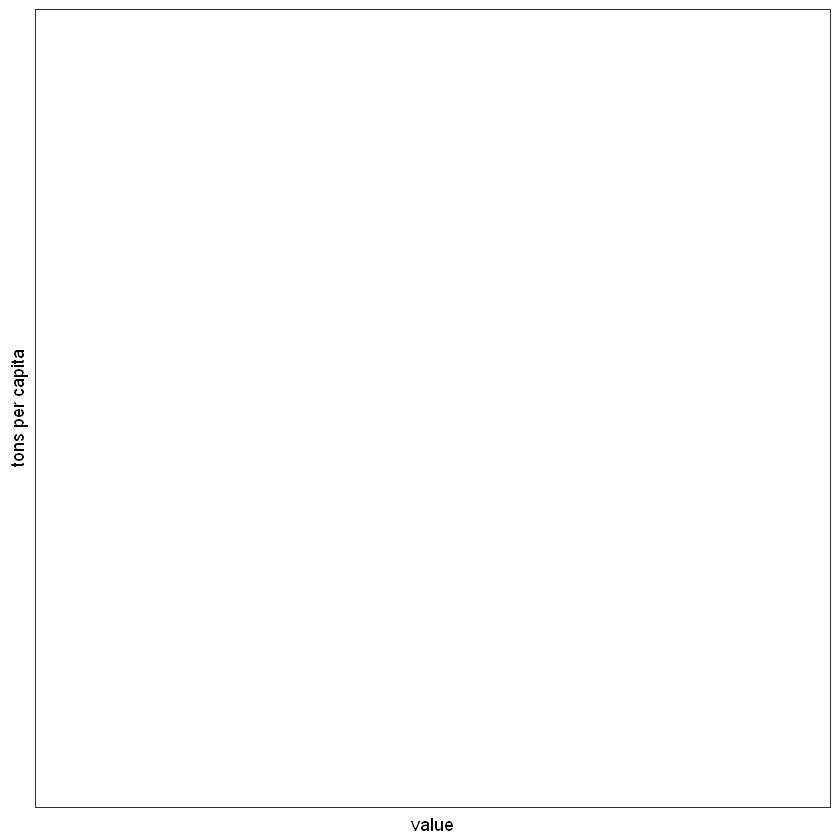

In [17]:
ggplot(temporal,aes(x=value,fill=variable))+geom_histogram(na.rm=T,position = "dodge",color="black")+
    theme_bw()+ylab("tons per capita")

#  <font color='red'>Comentario</font> 

En ggplot es recomendable poner solo el nombre de la columna, no dataframe\$columna
En el siguiente punto tenías que haber usado *geom_histogram*:
```
ggplot(cambioColumnas,aes(x=value,fill=variable))+geom_histogram(na.rm=T,position = "dodge",color="black")+
    theme_bw()+ylab("tons per capita")
```

#  <font color='red'>Comentario</font> 

*geom_density* no funciona así. Sería mejor usar esto:

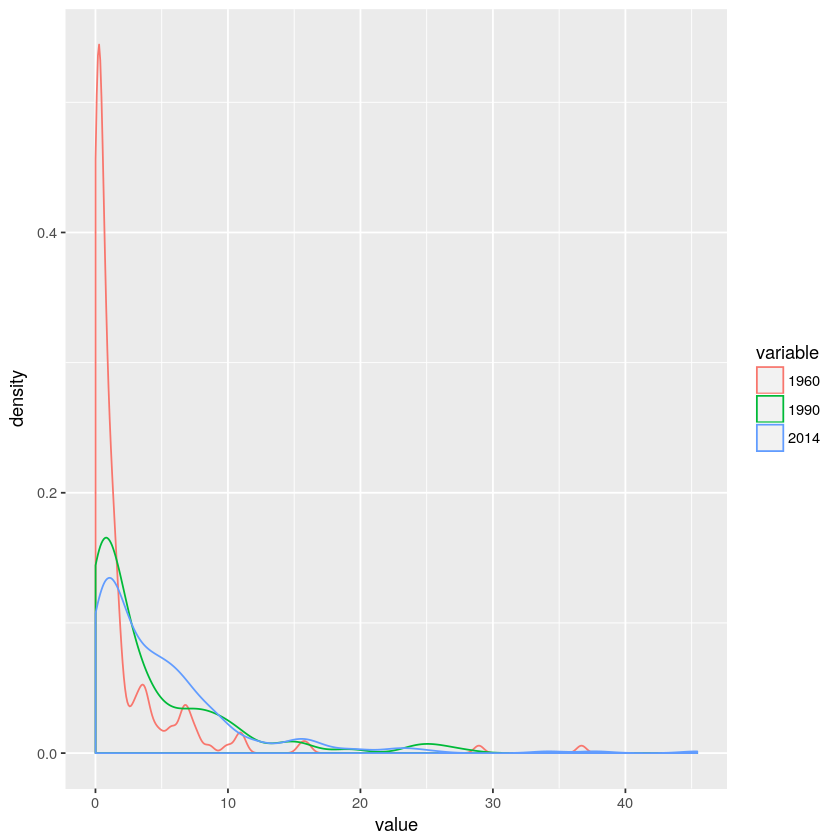

In [16]:
ggplot(temporal,aes(x=value,color=variable))+geom_density(na.rm=T)+
    theme_bw()+ylab("toneladas")

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

Using Country.Name, Country.Code as id variables


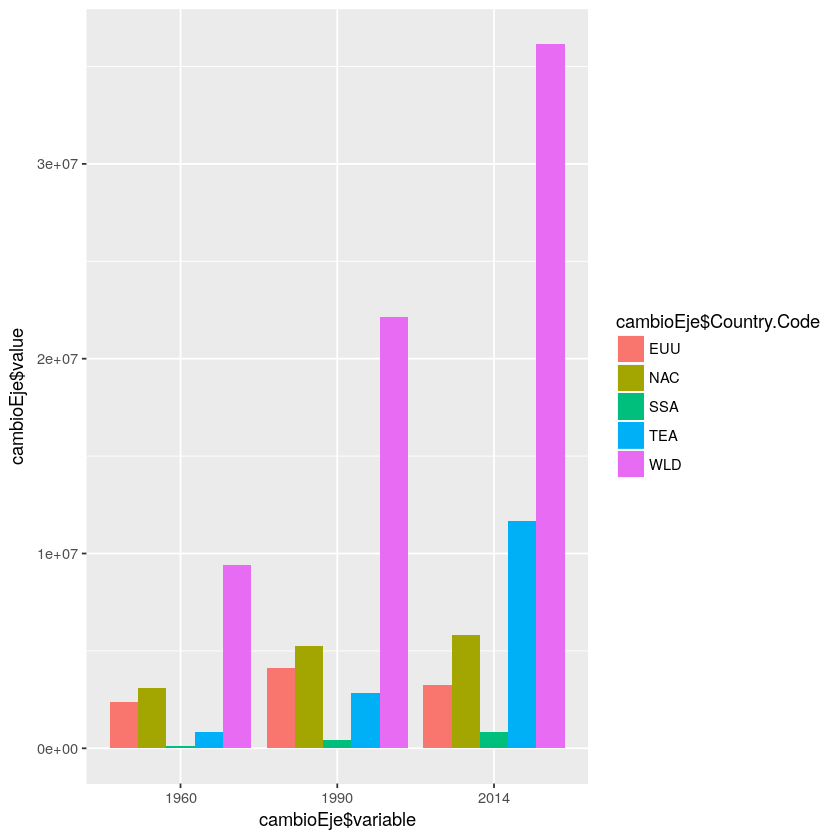

In [11]:
filtroEmisiones<-databank[databank$Indicator.Code =="EN.ATM.CO2E.KT",c(1,2,5,35,59)] 
filtroRegiones<-filtroEmisiones[filtroEmisiones$Country.Code=="WLD" | filtroEmisiones$Country.Code=="EUU" | filtroEmisiones$Country.Code=="SSA" | filtroEmisiones$Country.Code=="NAC" | filtroEmisiones$Country.Code=="TEA",]
cambioEje<-melt(filtroRegiones, na.rm=TRUE)
cambioEje$variable<-as.character(cambioEje$variable)
ggplot(data=cambioEje, aes(x=cambioEje$variable,y=cambioEje$value,fill=cambioEje$Country.Code)) + geom_bar(stat="identity",position="dodge")

Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

Using Country.Code, Indicator.Code as id variables



Call:
lm(formula = value ~ poly(variable, 1), data = anioFila)

Residuals:
     Min       1Q   Median       3Q      Max 
-2645119  -799907   -95503  1108298  2964241 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       21348296     197474  108.11   <2e-16 ***
poly(variable, 1) 52546250    1464504   35.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1465000 on 53 degrees of freedom
Multiple R-squared:  0.9605,	Adjusted R-squared:  0.9597 
F-statistic:  1287 on 1 and 53 DF,  p-value: < 2.2e-16


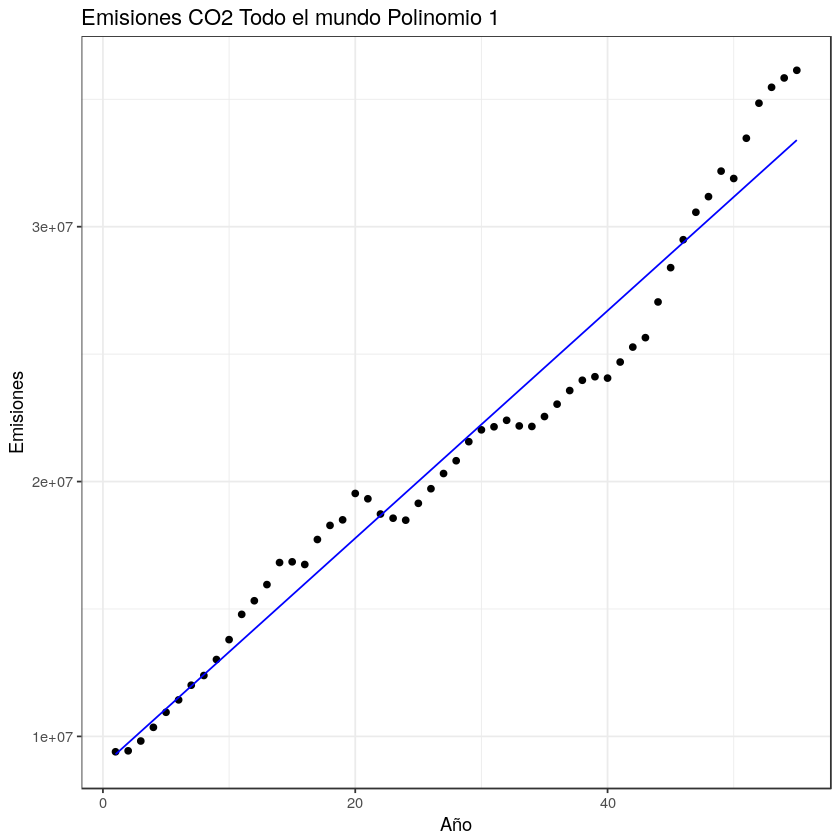

In [21]:
coe2ktwld<-subset(coe2kt,Country=="WLD")
model1<-lm(data=coe2ktwld,formula=value~Year)
print("El valor predicho por el modelo lineal es:")
predict(model1,data.frame(Year=2020))

model3<-lm(data=coe2ktwld,formula=value~poly(Year,3))
print("El valor predicho por el polinomio de grado 3 es:")
predict(model3,data.frame(Year=2020))

model10<-lm(data=coe2ktwld,formula=value~poly(Year,10))
print("El valor predicho por eel polinomio de grado 10 es:")
predict(model10,data.frame(Year=2020))

coe2ktwldpred<-data.frame(origin="Real",Year=coe2ktwld$Year,value=coe2ktwld$value)

years<-1960:2020
coe2ktwldpred<-rbind(coe2ktwldpred,data.frame(origin="Linear",Year=years,value=predict(model1,data.frame(Year=years))))
coe2ktwldpred<-rbind(coe2ktwldpred,data.frame(origin="Poly 3",Year=years,value=predict(model3,data.frame(Year=years))))
coe2ktwldpred<-rbind(coe2ktwldpred,data.frame(origin="Poly 10",Year=years,value=predict(model10,data.frame(Year=years))))

ggplot(data=coe2ktwldpred,aes(x=Year,y=value,color=origin))+geom_line()



#  <font color='red'>Comentario</font> 

Te falta la predicción para 2020, en el eje X el año de 0 a 50 es algo confuso. Habría que sumar 1960 a todos los valores del año. Debería ser algo como:
```
print("El valor predicho por el modelo lineal es:")
predict(model,data.frame(variable=2020))
```

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [1]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

In [30]:
aggdata <-aggregate(co2ppm, by=list(co2ppm$year), FUN=mean, na.rm=TRUE)
totalEmisiones<-databank[databank$Indicator.Code =="EN.ATM.CO2E.KT" & databank$Country.Code=="WLD",c(2,5:ncol(databank)-1)] 
anioFila<-melt(totalEmisiones, na.rm=TRUE)
anioFila$variable<-as.character(anioFila$variable)
colnames(anioFila)[3]<-"year"
juntarDataframes<-merge(anioFila,aggdata, by="year")

Using Country.Code, Indicator.Code as id variables


[1] "La correlación de las variables interpolated y EN.ATM.CO2E.KT es: 0.98"

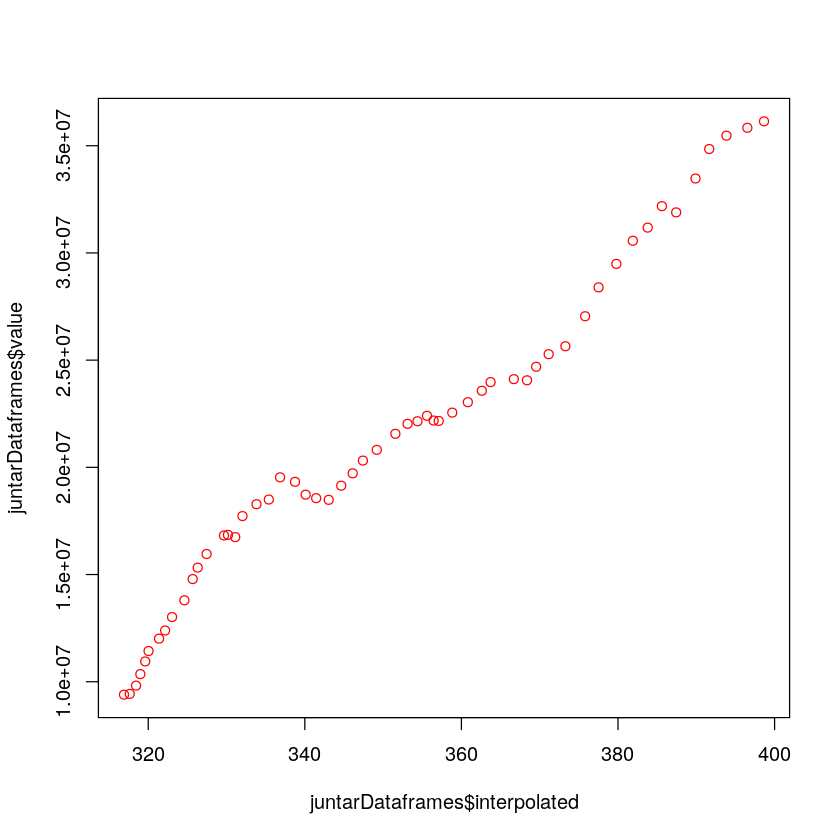

In [31]:
plot(juntarDataframes$interpolated,juntarDataframes$value,col="red")
cr<-cor(juntarDataframes$interpolated,juntarDataframes$value)
paste("La correlación de las variables interpolated y EN.ATM.CO2E.KT es:",round(cr,2))

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [49]:
matrizC<-juntarDataframes[,c("year","interpolated","value")]
colnames(weatherPraga)[2]<-"year"
dPraga<-weatherPraga[,c("year","EMNT")]
juntarTodos<-merge(matrizC,dPraga, by="year")
cor(juntarTodos[2:ncol(juntarTodos)], use="complete.obs")

,interpolated,value,EMNT
interpolated,1.0000000,0.9703198,0.1783153
value,0.9703198,1.0000000,0.2254552
EMNT,0.1783153,0.2254552,1.0000000
